In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC,NuSVC
import pandas as pd
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix
from scipy import stats
from sklearn.metrics import auc,classification_report
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import auc
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

In [2]:
df_normal = pd.read_csv('/Users/hongggenzhang/Desktop/ECG/data/data_normal_clean.csv', sep = ',')
df_normal

,QRS_Duration__ms_C,R_T_Axis_deviation,Group,Gender,Ventricular_Rate_C,P_Axis_C,R_Axis_C,T_Axis_C,QTc_Calculation_C,QTc_Bazett_C,...,P_Peak_Amplitude_C_aVR,Q_Peak_Amplitude_C_aVR,R_Peak_Amplitude_C_aVR,S_Peak_Amplitude_C_aVR,T_Peak_Amplitude_C_aVR,Q_Area_C_aVR,R_Area_C_aVR,S_Area_C_aVR,T_Area_C_aVR,Summated_QRS_integral_aVR
0,80.0,-26.0,38.0,0,70.0,3.0,8.0,34.0,453.0,144,...,-87.0,429.0,185.0,0.0,-190.0,896.0,369.0,0.0,-2298.0,1265.0
1,80.0,34.0,38.0,0,78.0,34.0,42.0,8.0,483.0,153,...,-83.0,1093.0,0.0,0.0,-219.0,1274.0,0.0,0.0,-1586.0,1274.0
2,88.0,24.0,38.0,0,86.0,15.0,59.0,35.0,430.0,136,...,-73.0,576.0,0.0,0.0,-214.0,711.0,0.0,0.0,-1092.0,711.0
3,96.0,-27.0,21.0,0,103.0,38.0,90.0,117.0,466.0,147,...,-185.0,722.0,434.0,0.0,24.0,705.0,524.0,0.0,-15.0,1229.0
4,74.0,-48.0,36.0,1,94.0,50.0,24.0,72.0,427.0,136,...,-122.0,1303.0,78.0,0.0,-126.0,1122.0,64.0,0.0,-543.0,1186.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56401,60.0,24.0,9.0,0,99.0,40.0,66.0,42.0,418.0,132,...,-117.0,585.0,483.0,0.0,-439.0,362.0,334.0,0.0,-1997.0,696.0
56402,78.0,47.0,9.0,1,99.0,54.0,103.0,56.0,449.0,142,...,-92.0,0.0,278.0,615.0,-434.0,0.0,148.0,387.0,-2196.0,535.0
56403,88.0,-26.0,9.0,0,99.0,59.0,34.0,60.0,432.0,136,...,-126.0,810.0,385.0,0.0,-346.0,675.0,402.0,0.0,-1766.0,1077.0
56404,74.0,47.0,10.0,1,99.0,74.0,73.0,26.0,445.0,142,...,-146.0,1118.0,83.0,0.0,-170.0,895.0,48.0,0.0,-883.0,943.0


In [3]:
df_normal_young = df_normal[df_normal['Group']<=26].copy()
df_normal_young = df_normal_young.reset_index(drop=True)
big_group = [[1],[2],[3,4],[5,6],[7,8,9],[10,11,12,13],[14,15,16,17],[18,19,20,21],[22,23,24,25,26]]
group_dic = {}
big_group_id = 1
for group_list in big_group:
    for i in group_list:
        group_dic[i] = big_group_id
    big_group_id+=1

In [4]:
group_num = df_normal_young['Group'].values
new_list  = []
for i in range(len(group_num)):
    new_list.append(group_dic[int(group_num[i])])
new_df = pd.DataFrame({'Group': new_list})
df_normal_young.update(new_df)

In [5]:
def data_age(dataframe, age):
    df_age = dataframe[dataframe['Group']==age]
    
    X = df_age.drop(['Gender'], axis=1)
    Y = df_age['Gender']
    InputX = X.values
    InputY = Y.values
    return InputX,InputY

<IPython.core.display.Javascript object>


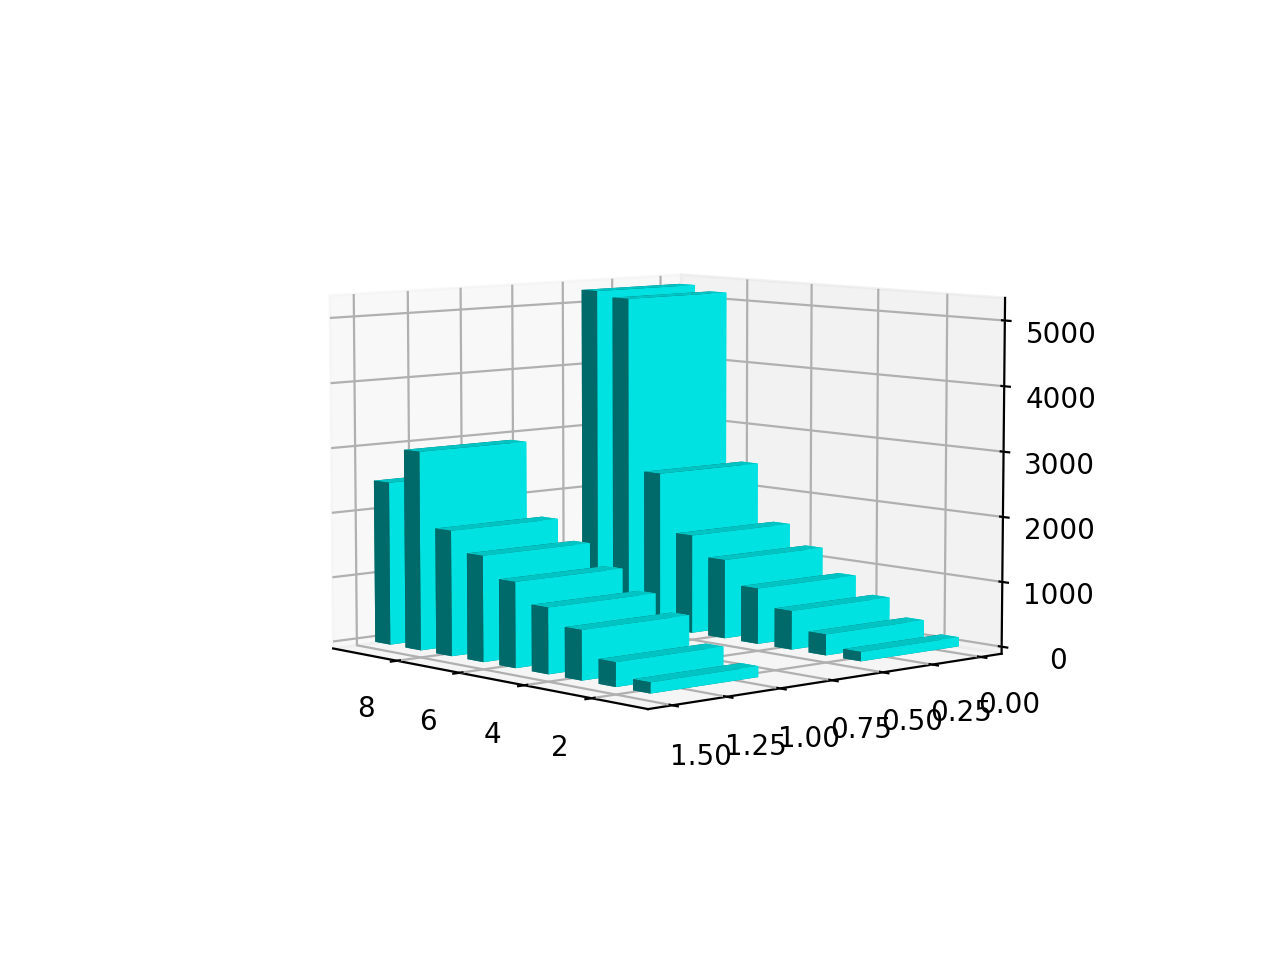

In [83]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation
def animate(frame):
  ax.view_init(30, frame/2)
  plt.pause(.001)
  return fig
%matplotlib notebook
plt.ioff()
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
x =  df_normal_young['Group'].values
y = df_normal_young['Gender'].values
hist, xedges, yedges = np.histogram2d(x, y, bins=[9,2], range=[[1, 10], [0, 2]])

xpos, ypos = np.meshgrid(xedges[:-1], yedges[:-1], indexing="ij")
xpos = xpos.ravel()
ypos = ypos.ravel()
zpos = 0

# Construct arrays with the dimensions for the 16 bars.
dx = 0.5 * np.ones_like(zpos)
dy = 0.5 * np.ones_like(zpos)
dz = hist.ravel()

ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average',color='aqua')

plt.show()
plt.savefig('/Users/hongggenzhang/Desktop/ECG/imgs/hist3d.png',dpi = 200)

accuracy 0.6065573770491803
Classification report (9 group) for classifier SVC(C=1, gamma='auto'):
              precision    recall  f1-score   support

           0       0.63      0.41      0.50        29
           1       0.60      0.78      0.68        32

    accuracy                           0.61        61
   macro avg       0.61      0.60      0.59        61
weighted avg       0.61      0.61      0.59        61


[[12 17]
 [ 7 25]]
accuracy 0.6496350364963503
Classification report (9 group) for classifier SVC(C=1, gamma='auto'):
              precision    recall  f1-score   support

           0       0.66      0.56      0.61        66
           1       0.64      0.73      0.68        71

    accuracy                           0.65       137
   macro avg       0.65      0.65      0.65       137
weighted avg       0.65      0.65      0.65       137


[[37 29]
 [19 52]]
accuracy 0.6231343283582089
Classification report (9 group) for classifier SVC(C=1, gamma='auto'):
         

<IPython.core.display.Javascript object>


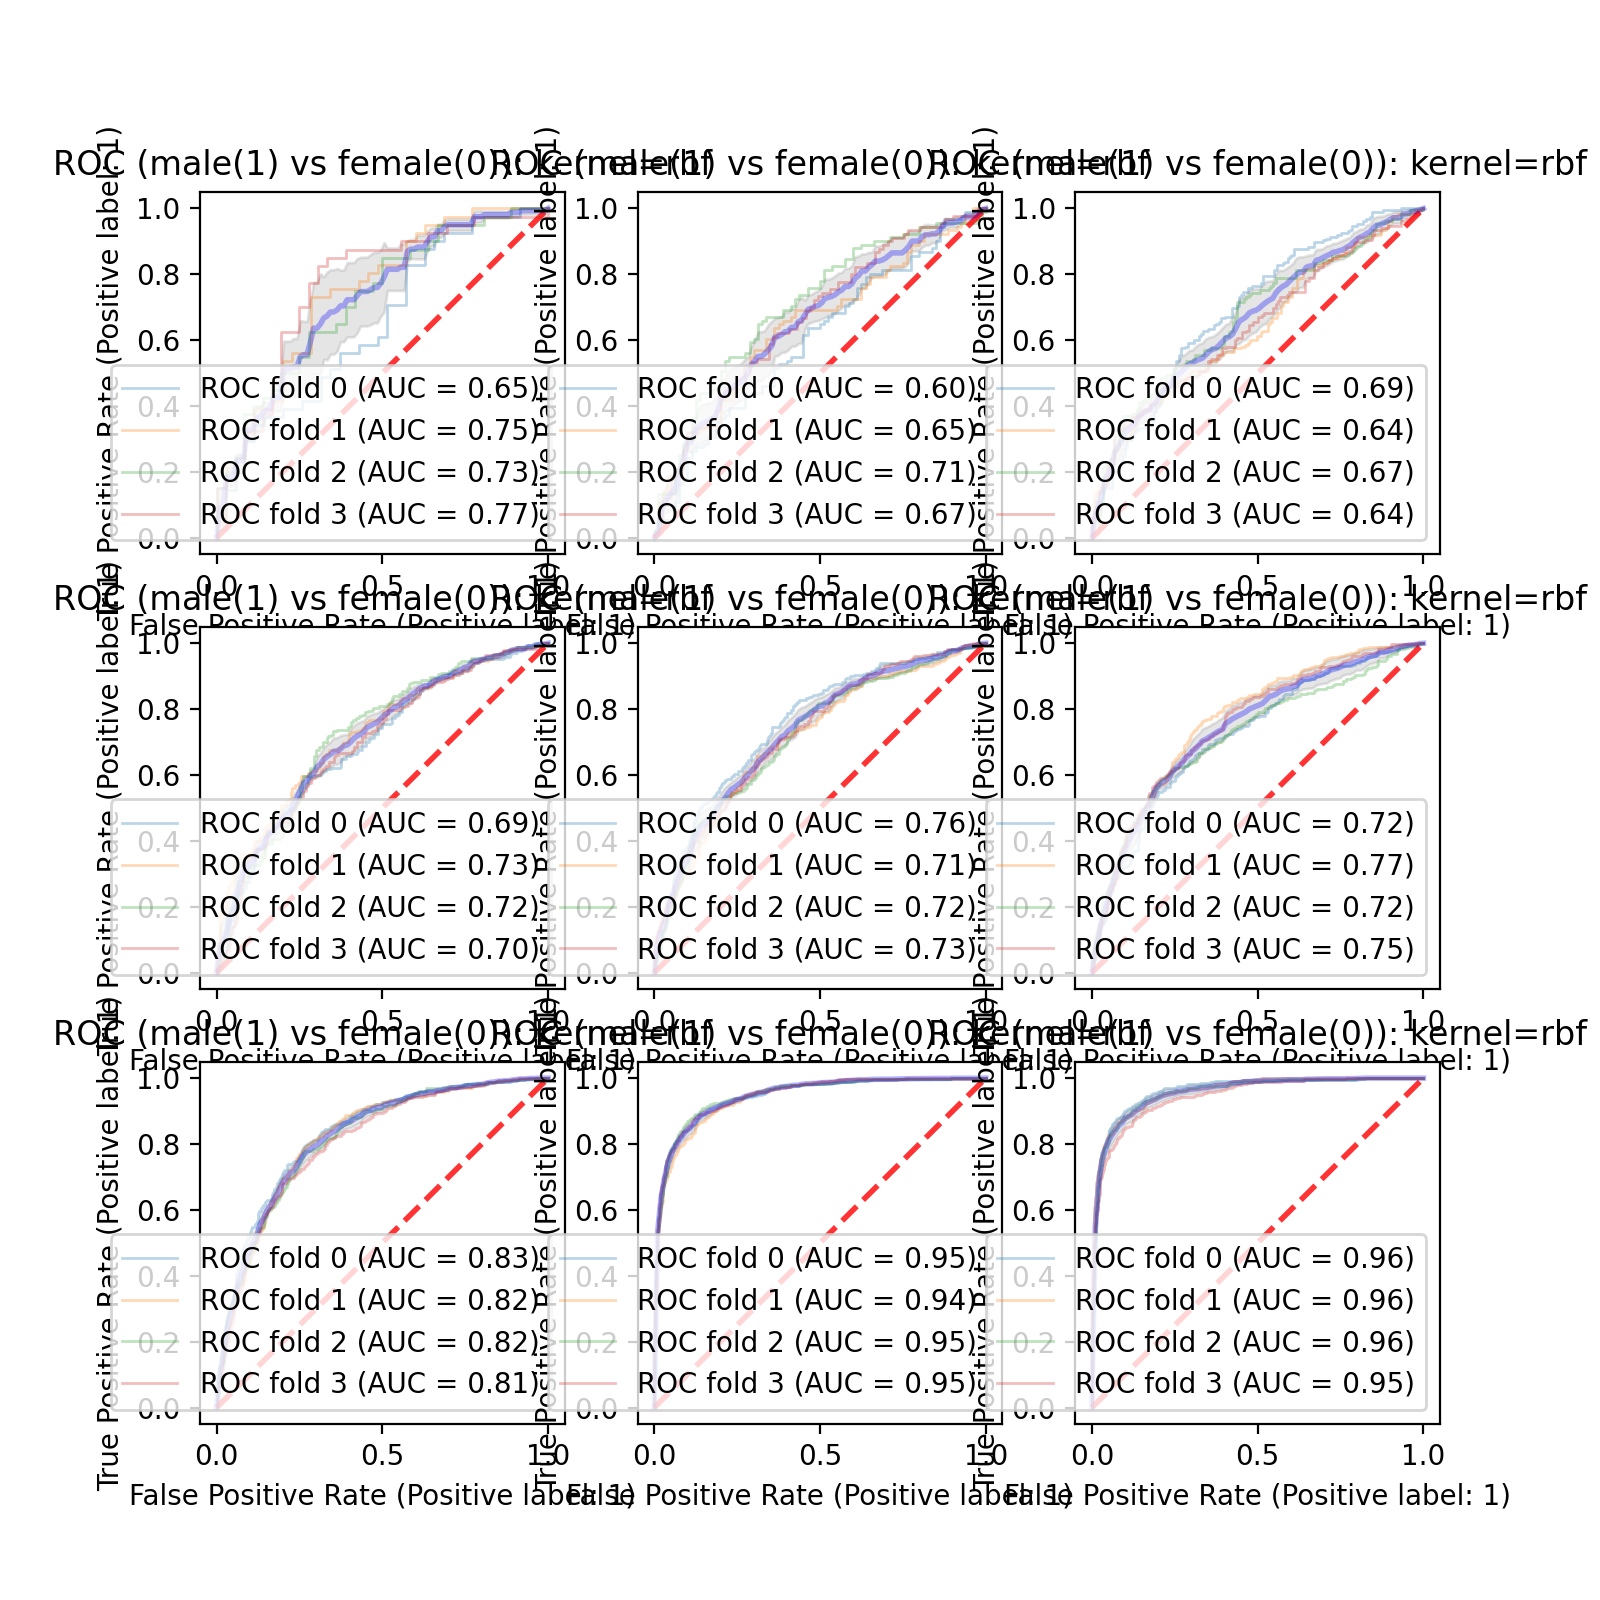

In [92]:
age_group = [1,2,3,4,5,6,7,8,9]
fig,axs = plt.subplots(3, 3,figsize = (15,15))
axs = list(axs.flat)
for age in age_group[:]:
    X_age,Y_age = data_age(df_normal_young, age)
    X_train, X_test, y_train, y_test = train_test_split(X_age, Y_age, test_size=0.2)
    scaler = StandardScaler().fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    classifier = SVC(kernel="rbf", gamma='auto', C=1)
    #classifier = SVC()
    #classifier = AdaBoostClassifier(n_estimators=100,learning_rate=0.1,  random_state=0)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    score = classifier.score(X_test, y_test)
    print('accuracy',score)
    conf = confusion_matrix(y_test,y_pred)
    print(f"Classification report (9 group) for classifier {classifier}:\n"
    f"{classification_report(y_test, y_pred)}\n")
    print(conf)
    #df_cm = pd.DataFrame(conf / np.sum(conf, axis=1)[:, None], index = [i for i in range(1,3)],
                     #columns = [i for i in range(1,3)])

    #plt.figure(figsize = (5,5))
    #sns.heatmap(df_cm, annot=True)
    #---------------------------------------
    #X_age, Y_age = 
    cv = StratifiedKFold(n_splits=4,shuffle = True)
#classifier = BaggingClassifier(estimator=SVC(kernel="rbf"),n_estimators=10,max_samples=0.9, random_state=0)
    #classifier = SVC(kernel="linear")
    classifier = SVC(kernel="rbf", gamma='auto', C=1)
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)


    ax = axs[age-1]
    best_auc = 0
    best_estimator = None
    best_x_test =None
    #best_y_test = NonY
    best_viz = None

    for i, (train, test) in enumerate(cv.split(X_age, Y_age)):
        #print('1')
        

        scaler = StandardScaler().fit(X_age[train])
        X_train = scaler.transform(X_age[train])
        X_test = scaler.transform(X_age[test])

        classifier.fit(X_train, Y_age[train])

        x_test = X_test
        y_test = Y_age[test]
        viz = RocCurveDisplay.from_estimator(
            classifier,
            x_test,
            y_test,
            name="ROC fold {}".format(i),
            alpha=0.3,
            lw=1,
            ax=ax,
            pos_label = 1,
        )


        #print(viz.roc_auc)
        interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
        interp_tpr[0] = 0.0
        tprs.append(interp_tpr)
        aucs.append(viz.roc_auc)



    ax.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax.plot(
        mean_fpr,
        mean_tpr,
        color="b",
        label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
        lw=2,
        alpha=0.3,
    )

    std_tpr = np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    ax.fill_between(
        mean_fpr,
        tprs_lower,
        tprs_upper,
        color="grey",
        alpha=0.2,
        label=r"$\pm$ 1 std. dev.",
    )

    ax.set(
        xlim=[-0.05, 1.05],
        ylim=[-0.05, 1.05],
        title='ROC (male(1) vs female(0)): kernel=rbf', 
    )
    #ax.legend(loc="lower right")
plt.show()
    #plt.savefig('/Users/hongggenzhang/Desktop/ECG/imgs/roc_'+str(age)+'.png',dpi = 200)

#df = pd.DataFrame(my_array, columns = features)

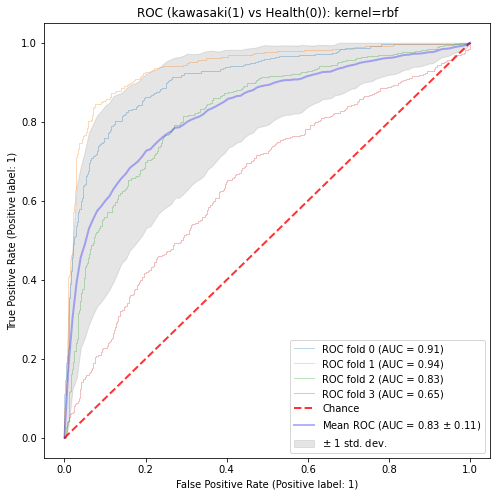

In [33]:
cv = StratifiedKFold(n_splits=4)
#classifier = BaggingClassifier(estimator=SVC(kernel="rbf"),n_estimators=10,max_samples=0.9, random_state=0)
classifier = SVC(kernel="linear")
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig,ax = plt.subplots(figsize = (8,8))
best_auc = 0
best_estimator = None
best_x_test =None
#best_y_test = NonY
best_viz = None

for i, (train, test) in enumerate(cv.split(X_age, Y_age)):
    #print('1')
    
    scaler = StandardScaler().fit(X_age[train])
    X_train = scaler.transform(X_age[train])
    X_test = scaler.transform(X_age[test])
    
    classifier.fit(X_train, Y_age[train])

    x_test = X_test
    y_test = Y_age[test]
    viz = RocCurveDisplay.from_estimator(
        classifier,
        x_test,
        y_test,
        name="ROC fold {}".format(i),
        alpha=0.3,
        lw=1,
        ax=ax,
        pos_label = 1,
    )


    #print(viz.roc_auc)
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)



ax.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.3,
)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    title='ROC (male(1) vs female(0)): kernel=rbf', 
)
ax.legend(loc="lower right")
plt.show()